# 14. 통계 분석 기법을 이용한 가설 검정
## 14-1. 가설 검정이란?
## 14-2. t-검정 - 두 집단의 평균 비교

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
os.chdir('C:\\Users\\user\\Documents\\GitHub\\Doit_Python\\Data')
os.getcwd()

'C:\\Users\\user\\Documents\\GitHub\\Doit_Python\\Data'

### (p.334) compact 자동차와 suv 자동차의 도시 연비 t검정

In [5]:
mpg_raw = pd.read_csv('mpg.csv')

In [6]:
mpg = mpg_raw.copy()

In [8]:
mpg.query('category in ["compact", "suv"]') \
   .groupby('category', as_index = False) \
   .agg(n = ('category', 'count'),
        cty_mean = ('cty', 'mean'))

,category,n,cty_mean
0,compact,47,20.12766
1,suv,62,13.50000


In [14]:
compact = mpg.query('category == "compact"')['cty']
suv = mpg.query('category == "suv"')['cty']

In [16]:
stats.ttest_ind(compact, suv, equal_var = True)

Ttest_indResult(statistic=11.917282584324107, pvalue=2.3909550904711282e-21)

### (p.335) 일반 휘발유와 고급 휘발유의 도시 연비 t검정

In [17]:
mpg['fl'].value_counts()

r    168
p     52
e      8
d      5
c      1
Name: fl, dtype: int64

In [18]:
mpg.query('fl in ["r", "p"]') \
   .groupby('fl', as_index = False) \
   .agg(n    = ('fl', 'count'),
        mean = ('cty', 'mean'))

,fl,n,mean
0,p,52,17.365385
1,r,168,16.738095


In [19]:
regular = mpg.query('fl == "r"')['cty']
premium = mpg.query('fl == "p"')['cty']

In [20]:
stats.ttest_ind(regular, premium, equal_var = True)

Ttest_indResult(statistic=-1.066182514588919, pvalue=0.28752051088667036)

## 14-3. 상관분석 - 두 변수의 관계 분석하기
### (p.337) 실업자 수와 개인 소비 지출의 상관관계

In [21]:
economics_raw = pd.read_csv('economics.csv')

In [22]:
economics = economics_raw.copy()

#### 1. 상관계수

In [25]:
economics[['unemploy', 'pce']].corr()

,unemploy,pce
unemploy,1.000000,0.614518
pce,0.614518,1.000000


#### 2. 유의확률

In [26]:
stats.pearsonr(economics['unemploy'], economics['pce'])

PearsonRResult(statistic=0.6145176141932082, pvalue=6.773527303291316e-61)

### (p.338) 상관행렬 히트맵 만들기

#### 1. 상관행렬

In [27]:
mtcars_raw = pd.read_csv('mtcars.csv')
mtcars = mtcars_raw.copy()

In [29]:
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [30]:
mtcars.shape

(32, 11)

In [31]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 2.9 KB


In [32]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [34]:
car_cor = mtcars.corr()
car_cor = round(car_cor, 2)
car_cor

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.00,-0.85,-0.85,-0.78,0.68,-0.87,0.42,0.66,0.60,0.48,-0.55
cyl,-0.85,1.00,0.90,0.83,-0.70,0.78,-0.59,-0.81,-0.52,-0.49,0.53
disp,-0.85,0.90,1.00,0.79,-0.71,0.89,-0.43,-0.71,-0.59,-0.56,0.39
hp,-0.78,0.83,0.79,1.00,-0.45,0.66,-0.71,-0.72,-0.24,-0.13,0.75
drat,0.68,-0.70,-0.71,-0.45,1.00,-0.71,0.09,0.44,0.71,0.70,-0.09
wt,-0.87,0.78,0.89,0.66,-0.71,1.00,-0.17,-0.55,-0.69,-0.58,0.43
qsec,0.42,-0.59,-0.43,-0.71,0.09,-0.17,1.00,0.74,-0.23,-0.21,-0.66
vs,0.66,-0.81,-0.71,-0.72,0.44,-0.55,0.74,1.00,0.17,0.21,-0.57
am,0.60,-0.52,-0.59,-0.24,0.71,-0.69,-0.23,0.17,1.00,0.79,0.06
gear,0.48,-0.49,-0.56,-0.13,0.70,-0.58,-0.21,0.21,0.79,1.00,0.27


#### 2. 히트맵 만들기

In [50]:
plt.rcParams.update({'figure.dpi'     : '120',
                     'figure.figsize' : [7.5, 7.5]})

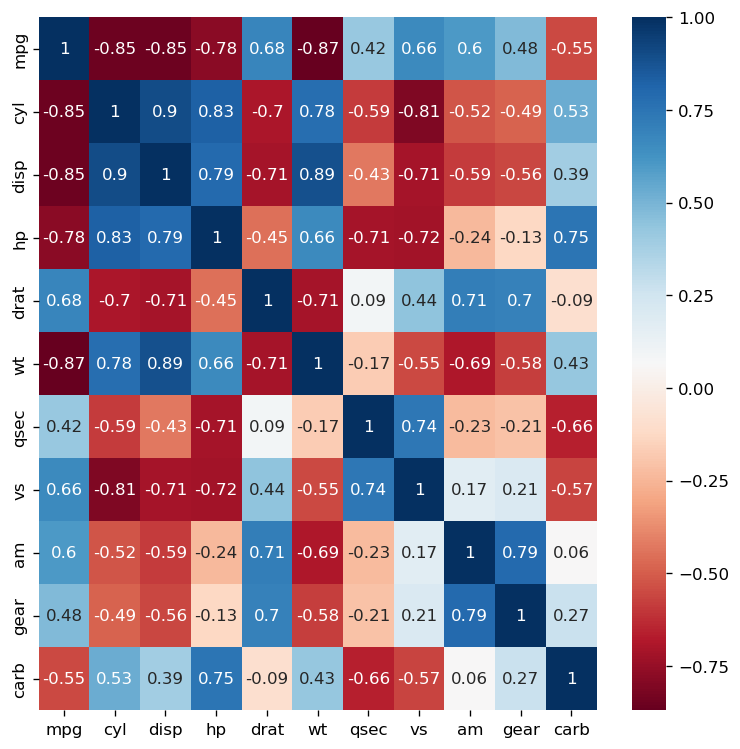

In [55]:
sns.heatmap(data = car_cor, 
            annot = True, 
            cmap = 'RdBu');

#### 3. 대각 행렬 제거하기

##### (1) mask 만들기

In [39]:
mask = np.zeros_like(car_cor)
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [40]:
mask[np.triu_indices_from(mask)] = 1
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

##### (2) 히트맵에 mask 적용하기

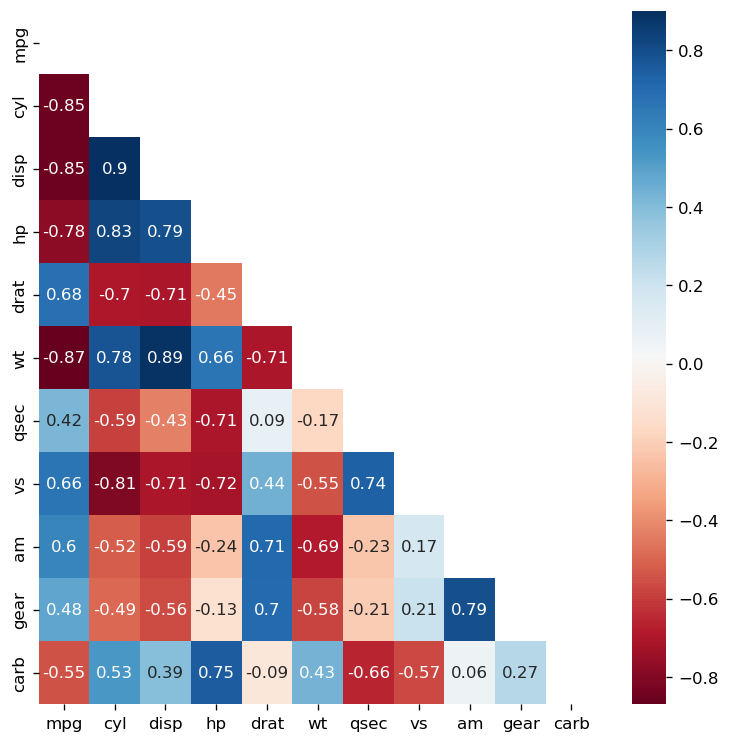

In [53]:
sns.heatmap(data = car_cor,
            annot = True,
            cmap = 'RdBu',
            mask = mask);

##### (5) 빈 행과 열 제거하기

In [54]:
mask_new = mask[1:, :-1]
cor_new = car_cor.iloc[1:, :-1]
cor_new

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear
cyl,-0.85,1.00,0.90,0.83,-0.70,0.78,-0.59,-0.81,-0.52,-0.49
disp,-0.85,0.90,1.00,0.79,-0.71,0.89,-0.43,-0.71,-0.59,-0.56
hp,-0.78,0.83,0.79,1.00,-0.45,0.66,-0.71,-0.72,-0.24,-0.13
drat,0.68,-0.70,-0.71,-0.45,1.00,-0.71,0.09,0.44,0.71,0.70
wt,-0.87,0.78,0.89,0.66,-0.71,1.00,-0.17,-0.55,-0.69,-0.58
qsec,0.42,-0.59,-0.43,-0.71,0.09,-0.17,1.00,0.74,-0.23,-0.21
vs,0.66,-0.81,-0.71,-0.72,0.44,-0.55,0.74,1.00,0.17,0.21
am,0.60,-0.52,-0.59,-0.24,0.71,-0.69,-0.23,0.17,1.00,0.79
gear,0.48,-0.49,-0.56,-0.13,0.70,-0.58,-0.21,0.21,0.79,1.00
carb,-0.55,0.53,0.39,0.75,-0.09,0.43,-0.66,-0.57,0.06,0.27


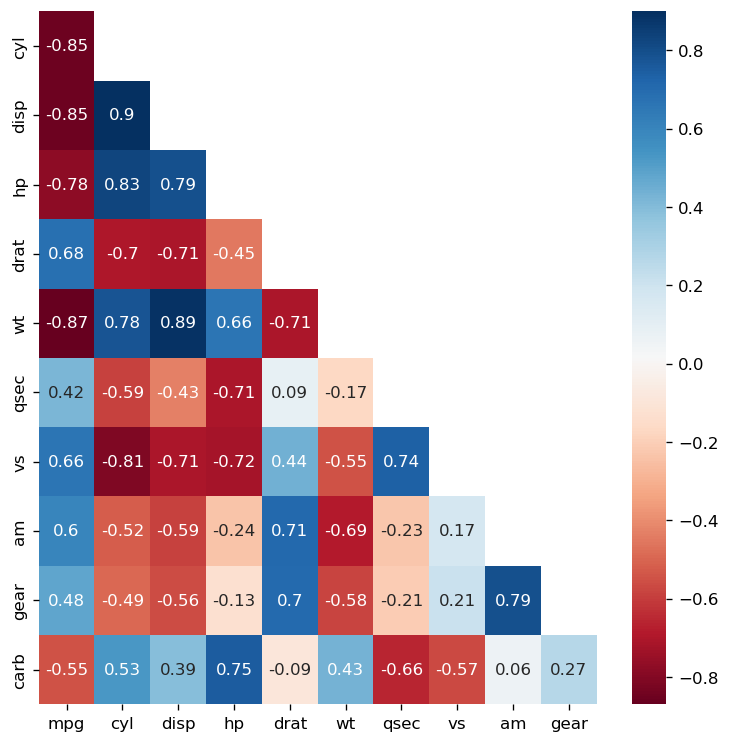

In [56]:
sns.heatmap(data = cor_new,
            annot = True,
            cmap = 'RdBu',
            mask = mask_new);

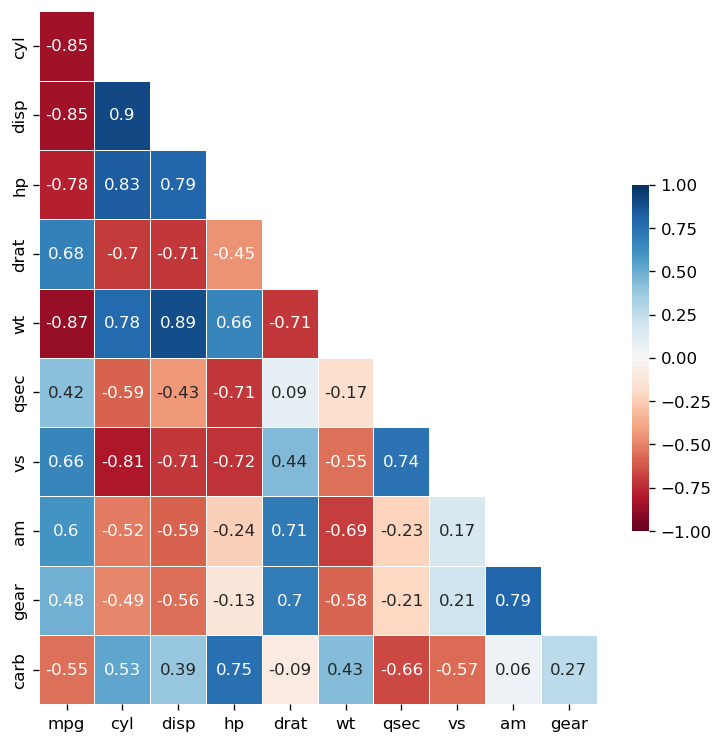

In [57]:
sns.heatmap(data = cor_new,
            annot = True,
            cmap = 'RdBu',
            mask = mask_new,
            linewidths = .5,
            vmax = 1,
            vmin = -1,
            cbar_kws = {"shrink" : .5});